# Customer Behavioral Analysis

## In this notebook we are going to perform following things:
### 1. Generate a random dataset using Numpy and Pandas
### 2. Perform Data Cleaning using PySpark
### 3. Exploratory Data Analysis (EDA) using PySpark
### 4. Feature Engineering
### 5. Business Insights and Recommendations
### 6. Customer Segmentation

# ---------------------------------------------------------------------------

### 1. Generate a random dataset using Numpy and Pandas

In [1]:
#Import required librarires
import pandas as pd
import numpy as np
import random

In [2]:
# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)

In [3]:
# Define number of rows
num_rows = 100000

In [4]:
# Generate random dates spanning 3 consecutive years (2021-2023)
dates = pd.date_range(start="2021-01-01", end="2023-12-31", freq="D")
transaction_dates = np.random.choice(dates, num_rows)

In [5]:
# Generate random Customer IDs
customer_ids = [f'CUST{str(i).zfill(5)}' for i in np.random.randint(1, 5000, num_rows)]

In [6]:
# Generate random Product IDs and Categories
product_ids = [f'P{str(i).zfill(4)}' for i in np.random.randint(1, 200, num_rows)]
categories = ["Electronics", "Fashion", "Home & Kitchen", "Sports", "Toys", "Beauty", "Books", "Grocery"]
product_names = [f"Product_{i}" for i in np.random.randint(1, 200, num_rows)]
product_categories = np.random.choice(categories, num_rows)

In [7]:
# Generate random prices, quantity, and total spending (with outliers)
prices = np.round(np.random.uniform(5, 2000, num_rows), 2)
quantities = np.random.randint(1, 5, num_rows)
total_spending = np.round(prices * quantities, 2)

In [8]:
# Introduce some outliers in price and total spending
outlier_indices = np.random.choice(num_rows, size=500, replace=False)
prices[outlier_indices] *= 10  # Extreme high values
total_spending[outlier_indices] *= 10

In [9]:
# Payment Methods
payment_methods = ["Credit Card", "Debit Card", "PayPal"]
payment_choices = np.random.choice(payment_methods, num_rows)

In [10]:
# Store Locations (Cities)
store_locations = ["New York", "Los Angeles", "Chicago", "Houston", "Miami", "Seattle", "San Francisco", "Boston"]
store_choices = np.random.choice(store_locations, num_rows)

In [11]:
# Device Used
devices = ["Mobile", "Desktop"]
device_choices = np.random.choice(devices, num_rows)

In [12]:
# Discounts Applied (some missing values)
discount_applied = np.random.choice([0, 5, 10, 20, np.nan], num_rows)

In [13]:
# Customer Demographics (Age, Gender, Income with some missing values)
ages = np.random.randint(18, 75, num_rows)
genders = np.random.choice(["Male", "Female", "Non-Binary"], num_rows)
incomes = np.random.choice([35000, 50000, 75000, 100000, 125000, np.nan], num_rows)

In [14]:
# Membership Level
membership_levels = ["Bronze", "Silver", "Gold", "Platinum"]
memberships = np.random.choice(membership_levels, num_rows)

In [15]:
# Ratings (with some missing values)
ratings = np.random.choice([1, 2, 3, 4, 5, np.nan], num_rows)

In [16]:
# Return Flag (Yes/No)
return_flag = np.random.choice(["Yes", "No"], num_rows, p=[0.1, 0.9])

In [17]:
# Create the DataFrame
df = pd.DataFrame({
    "Transaction_ID": [f'TXN{str(i).zfill(6)}' for i in range(num_rows)],
    "Customer_ID": customer_ids,
    "Transaction_Date": transaction_dates,
    "Product_ID": product_ids,
    "Product_Name": product_names,
    "Category": product_categories,
    "Price": prices,
    "Quantity": quantities,
    "Total_Spending": total_spending,
    "Payment_Method": payment_choices,
    "Store_Location": store_choices,
    "Device_Used": device_choices,
    "Discount_Applied": discount_applied,
    "Customer_Age": ages,
    "Customer_Gender": genders,
    "Customer_Income": incomes,
    "Membership_Level": memberships,
    "Rating": ratings,
    "Return_Flag": return_flag
})

In [18]:
# Introduce duplicate rows (around 1% of data)
duplicate_indices = np.random.choice(num_rows, size=int(num_rows * 0.01), replace=False)
df = pd.concat([df, df.iloc[duplicate_indices]], ignore_index=True)

In [19]:
# Introduce some completely missing rows (simulating corruption)
missing_rows = pd.DataFrame(np.nan, index=range(500), columns=df.columns)
df = pd.concat([df, missing_rows], ignore_index=True)

C:\Users\anish\AppData\Local\Temp\ipykernel_17284\1338660909.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, missing_rows], ignore_index=True)


In [20]:
# Shuffle the dataset
df = df.sample(frac=1).reset_index(drop=True)

In [21]:
# Save dataset
df.to_csv("raw_customer_transactions.csv", index=False)

In [22]:
# Display dataset info
print(f"Dataset Generated: {df.shape[0]} rows x {df.shape[1]} columns")

Dataset Generated: 101500 rows x 19 columns


In [23]:
#First 5 rows of the dataset
print("Sample Data:")
print(df.head())

Sample Data:
  Transaction_ID Customer_ID Transaction_Date Product_ID Product_Name  \
0      TXN024193   CUST04559       2022-10-25      P0091   Product_43   
1      TXN078061   CUST00473       2021-04-01      P0053   Product_37   
2      TXN069931   CUST01195       2021-03-25      P0193   Product_26   
3      TXN035588   CUST03417       2023-06-23      P0114  Product_140   
4      TXN089008   CUST02386       2021-06-27      P0167  Product_175   

         Category    Price  Quantity  Total_Spending Payment_Method  \
0          Sports   120.05       2.0          240.10     Debit Card   
1  Home & Kitchen  1099.19       4.0         4396.76         PayPal   
2          Beauty  1705.50       2.0         3411.00    Credit Card   
3     Electronics  1287.81       2.0         2575.62    Credit Card   
4         Fashion  1096.35       4.0         4385.40    Credit Card   

  Store_Location Device_Used  Discount_Applied  Customer_Age Customer_Gender  \
0    Los Angeles     Desktop             

In [24]:
#Summary statistics of the dataset
print(df.describe())

                    Transaction_Date          Price       Quantity  \
count                         101000  101000.000000  101000.000000   
mean   2022-07-01 20:17:37.615841792    1045.414078       2.500663   
min              2021-01-01 00:00:00       5.060000       1.000000   
25%              2021-10-01 00:00:00     508.067500       2.000000   
50%              2022-07-02 00:00:00    1007.875000       2.000000   
75%              2023-04-01 00:00:00    1506.360000       3.000000   
max              2023-12-31 00:00:00   19865.000000       4.000000   
std                              NaN     936.675556       1.117029   

       Total_Spending  Discount_Applied   Customer_Age  Customer_Income  \
count   101000.000000      80884.000000  101000.000000     84149.000000   
mean      2616.002295          8.740789      45.909921     76802.279290   
min          5.080000          0.000000      18.000000     35000.000000   
25%        969.020000          0.000000      31.000000     50000.0000

In [25]:
#Concise summary of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101500 entries, 0 to 101499
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Transaction_ID    101000 non-null  object        
 1   Customer_ID       101000 non-null  object        
 2   Transaction_Date  101000 non-null  datetime64[ns]
 3   Product_ID        101000 non-null  object        
 4   Product_Name      101000 non-null  object        
 5   Category          101000 non-null  object        
 6   Price             101000 non-null  float64       
 7   Quantity          101000 non-null  float64       
 8   Total_Spending    101000 non-null  float64       
 9   Payment_Method    101000 non-null  object        
 10  Store_Location    101000 non-null  object        
 11  Device_Used       101000 non-null  object        
 12  Discount_Applied  80884 non-null   float64       
 13  Customer_Age      101000 non-null  float64       
 14  Cust

# --------------------------------------------------------------------------

## 2. Perform Data Cleaning using PySpark

In [26]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, when, isnan, mean, stddev, round
from pyspark.sql.types import IntegerType, DoubleType, StringType, DateType

In [27]:
# 1: Create Spark Session
spark = SparkSession.builder.appName("CustomerTransactionCleaning").getOrCreate()

In [28]:
# 2: Load the raw dataset
file_path = "raw_customer_transactions.csv"  # Update with your actual path
df_raw = spark.read.csv(file_path, header=True, inferSchema=True)

In [29]:
# 3: Display raw data
print("Initial Data Preview:")
df_raw.show(5)

Initial Data Preview:
+--------------+-----------+----------------+----------+------------+--------------+-------+--------+--------------+--------------+--------------+-----------+----------------+------------+---------------+---------------+----------------+------+-----------+
|Transaction_ID|Customer_ID|Transaction_Date|Product_ID|Product_Name|      Category|  Price|Quantity|Total_Spending|Payment_Method|Store_Location|Device_Used|Discount_Applied|Customer_Age|Customer_Gender|Customer_Income|Membership_Level|Rating|Return_Flag|
+--------------+-----------+----------------+----------+------------+--------------+-------+--------+--------------+--------------+--------------+-----------+----------------+------------+---------------+---------------+----------------+------+-----------+
|     TXN024193|  CUST04559|      2022-10-25|     P0091|  Product_43|        Sports| 120.05|     2.0|         240.1|    Debit Card|   Los Angeles|    Desktop|             0.0|        32.0|     Non-Binary|   

In [30]:
# 4: Check schema (Data Types)
print("Initial Schema:")
df_raw.printSchema()

Initial Schema:
root
 |-- Transaction_ID: string (nullable = true)
 |-- Customer_ID: string (nullable = true)
 |-- Transaction_Date: date (nullable = true)
 |-- Product_ID: string (nullable = true)
 |-- Product_Name: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Price: double (nullable = true)
 |-- Quantity: double (nullable = true)
 |-- Total_Spending: double (nullable = true)
 |-- Payment_Method: string (nullable = true)
 |-- Store_Location: string (nullable = true)
 |-- Device_Used: string (nullable = true)
 |-- Discount_Applied: double (nullable = true)
 |-- Customer_Age: double (nullable = true)
 |-- Customer_Gender: string (nullable = true)
 |-- Customer_Income: double (nullable = true)
 |-- Membership_Level: string (nullable = true)
 |-- Rating: double (nullable = true)
 |-- Return_Flag: string (nullable = true)



In [31]:
# 5: Remove Duplicate Rows
df_cleaned = df_raw.dropDuplicates()
print("Duplicate Rows Removed.")

Duplicate Rows Removed.


In [7]:
# 6: Handle Missing Values

In [32]:
# Check missing values in each column
print("Missing Values Count:")
df_cleaned.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()

Missing Values Count:
+--------------+-----------+----------------+----------+------------+--------+-----+--------+--------------+--------------+--------------+-----------+----------------+------------+---------------+---------------+----------------+------+-----------+
|Transaction_ID|Customer_ID|Transaction_Date|Product_ID|Product_Name|Category|Price|Quantity|Total_Spending|Payment_Method|Store_Location|Device_Used|Discount_Applied|Customer_Age|Customer_Gender|Customer_Income|Membership_Level|Rating|Return_Flag|
+--------------+-----------+----------------+----------+------------+--------+-----+--------+--------------+--------------+--------------+-----------+----------------+------------+---------------+---------------+----------------+------+-----------+
|             1|          1|               1|         1|           1|       1|    1|       1|             1|             1|             1|          1|           19913|           1|              1|          16685|               1| 1

In [33]:
# Drop rows where most critical columns are missing (Transaction_ID, Customer_ID, Product_ID)
df_cleaned = df_cleaned.dropna(subset=["Transaction_ID", "Customer_ID", "Product_ID"])
print("Dropped Rows with Critical Missing Values.")

Dropped Rows with Critical Missing Values.


In [34]:
# Fill missing values in categorical columns with "Unknown"
df_cleaned = df_cleaned.fillna({"Payment_Method": "Unknown", "Store_Location": "Unknown", "Device_Used": "Unknown"})

In [35]:
# Fill missing values in numeric columns with mean or default values
df_cleaned = df_cleaned.fillna({"Customer_Age": df_cleaned.select(mean(col("Customer_Age"))).collect()[0][0],
                "Customer_Income": df_cleaned.select(mean(col("Customer_Income"))).collect()[0][0],
                "Discount_Applied": 0,
                "Rating": 3.0})  # Default rating set to 3.0
print("Missing Values Handled.")

Missing Values Handled.


In [36]:
# 7: Detect & Remove Outliers in Price and Total Spending

In [37]:
# Calculate mean and standard deviation for detecting outliers
stats_df = df_cleaned.select(
    mean(col("Price")).alias("mean_price"), stddev(col("Price")).alias("std_price"),
    mean(col("Total_Spending")).alias("mean_spending"), stddev(col("Total_Spending")).alias("std_spending")
).collect()

mean_price, std_price = stats_df[0]["mean_price"], stats_df[0]["std_price"]
mean_spending, std_spending = stats_df[0]["mean_spending"], stats_df[0]["std_spending"]

In [38]:
# Apply Z-score method: Remove rows where values are greater than 3 standard deviations from the mean
df_cleaned = df_cleaned.filter((col("Price") <= mean_price + 3 * std_price) & (col("Total_Spending") <= mean_spending + 3 * std_spending))

print("Outliers Removed.")

Outliers Removed.


In [39]:
# 8: Fix Data Types

In [40]:
# Convert Transaction_Date to DateType
df_cleaned = df_cleaned.withColumn("Transaction_Date", col("Transaction_Date").cast(DateType()))

In [41]:
# Convert Numeric Columns to proper types
df_cleaned = df_cleaned.withColumn("Customer_Age", col("Customer_Age").cast(IntegerType()))
df_cleaned = df_cleaned.withColumn("Price", col("Price").cast(DoubleType()))
df_cleaned = df_cleaned.withColumn("Total_Spending", col("Total_Spending").cast(DoubleType()))
df_cleaned = df_cleaned.withColumn("Discount_Applied", col("Discount_Applied").cast(DoubleType()))

print("Data Types Fixed.")

Data Types Fixed.


In [42]:
# 9: Standardize Categorical Values

In [43]:
# Ensure consistency in Payment Method
df_cleaned = df_cleaned.withColumn("Payment_Method",
                   when(col("Payment_Method").like("%Card%"), "Card")
                   .when(col("Payment_Method") == "PayPal", "PayPal")
                   .otherwise("Other"))

In [44]:
# Ensure consistency in Store Location (Title Case Format)
df_cleaned = df_cleaned.withColumn("Store_Location", col("Store_Location").alias("Store_Location").cast(StringType()))

In [45]:
# Ensure Device Used values are consistent
df_cleaned = df_cleaned.withColumn("Device_Used",
                   when(col("Device_Used") == "Mobile", "Mobile")
                   .when(col("Device_Used") == "Desktop", "Desktop")
                   .otherwise("Unknown"))

In [46]:
print("Categorical Values Standardized.")

Categorical Values Standardized.


In [48]:
# 10: Save Cleaned Dataset
output_path = "cleaned_customer_transactions.csv"
df_cleaned.write.mode("overwrite").csv(output_path, header=True)

print("Data Cleaning Complete!")

Data Cleaning Complete!


# ------------------------------------------------------------------

## 3. Exploratory Data Analysis (EDA) using PySpark

### Key EDA Steps
### 1. Load the Cleaned Dataset into PySpark
### 2. Check Summary Statistics
### 3. Analyze Customer Demographics (Age, Gender, Income)
### 4. Identify Top-Selling Products & Categories
### 5. Analyze Purchase Behavior (Spending Trends, Seasonal Trends)
### 6. Identify Most Popular Payment Methods
### 7. Analyze Customer Loyalty & Returns
### 8. Save Processed Data for Tableau

In [49]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, avg, sum, min, max, round, year, month, dayofweek, desc

In [50]:
# 1: Create Spark Session
spark = SparkSession.builder.appName("CustomerTransactionEDA").getOrCreate()

In [53]:
# 2: Load the Cleaned Dataset
file_path = "cleaned_customer_transactions.csv"  # Update path if needed
df_cleaned = spark.read.csv(file_path, header=True, inferSchema=True)

In [54]:
# 3: Check Summary Statistics
print("Summary Statistics:")
df_cleaned.describe().show()

Summary Statistics:
+-------+--------------+-----------+----------+------------+--------+------------------+------------------+-----------------+--------------+--------------+-----------+-----------------+------------------+---------------+------------------+----------------+------------------+-----------+
|summary|Transaction_ID|Customer_ID|Product_ID|Product_Name|Category|             Price|          Quantity|   Total_Spending|Payment_Method|Store_Location|Device_Used| Discount_Applied|      Customer_Age|Customer_Gender|   Customer_Income|Membership_Level|            Rating|Return_Flag|
+-------+--------------+-----------+----------+------------+--------+------------------+------------------+-----------------+--------------+--------------+-----------+-----------------+------------------+---------------+------------------+----------------+------------------+-----------+
|  count|         99601|      99601|     99601|       99601|   99601|             99601|             99601|         

In [55]:
# 4: Analyze Customer Demographics

In [56]:
# 4.1 - Gender Distribution
print("Gender Distribution:")
df_cleaned.groupBy("Customer_Gender").count().show()

Gender Distribution:
+---------------+-----+
|Customer_Gender|count|
+---------------+-----+
|         Female|33333|
|     Non-Binary|33266|
|           Male|33002|
+---------------+-----+



In [57]:
# 4.2 - Age Distribution (Min, Max, Avg Age)
print("Customer Age Distribution:")
df_cleaned.select(min("Customer_Age").alias("Min_Age"),
          max("Customer_Age").alias("Max_Age"),
          round(avg("Customer_Age"), 2).alias("Avg_Age")).show()

Customer Age Distribution:
+-------+-------+-------+
|Min_Age|Max_Age|Avg_Age|
+-------+-------+-------+
|     18|     74|   45.9|
+-------+-------+-------+



In [58]:
# 4.3 - Income Distribution
print("Customer Income Distribution:")
df_cleaned.select(min("Customer_Income").alias("Min_Income"),
          max("Customer_Income").alias("Max_Income"),
          round(avg("Customer_Income"), 2).alias("Avg_Income")).show()

Customer Income Distribution:
+----------+----------+----------+
|Min_Income|Max_Income|Avg_Income|
+----------+----------+----------+
|   35000.0|  125000.0|   76814.5|
+----------+----------+----------+



In [35]:
# 5: Identify Top-Selling Products & Categories

In [59]:
# 5.1 - Top 10 Best-Selling Products
print("Top 10 Best-Selling Products:")
df_cleaned.groupBy("Product_Name").agg(sum("Quantity").alias("Total_Sales")).orderBy(desc("Total_Sales")).limit(10).show()

Top 10 Best-Selling Products:
+------------+-----------+
|Product_Name|Total_Sales|
+------------+-----------+
|  Product_75|     1398.0|
| Product_109|     1394.0|
| Product_131|     1383.0|
| Product_157|     1383.0|
|   Product_5|     1380.0|
|  Product_56|     1360.0|
|  Product_23|     1359.0|
| Product_100|     1359.0|
|  Product_40|     1358.0|
| Product_168|     1354.0|
+------------+-----------+



In [60]:
# 5.2 - Top 5 Categories by Sales
print("Top 5 Selling Categories:")
df_cleaned.groupBy("Category").agg(sum("Total_Spending").alias("Revenue")).orderBy(desc("Revenue")).limit(5).show()

Top 5 Selling Categories:
+--------+--------------------+
|Category|             Revenue|
+--------+--------------------+
|   Books| 3.170098336999999E7|
|  Sports|3.1395080310000006E7|
|    Toys|3.1340617919999998E7|
| Fashion|3.1163668700000003E7|
|  Beauty|3.1092641989999987E7|
+--------+--------------------+



In [61]:
# 6: Analyze Spending Trends

In [62]:
# 6.1 - Extract Year & Month from Transaction Date
df_cleaned = df_cleaned.withColumn("Year", year(col("Transaction_Date")))
df_cleaned = df_cleaned.withColumn("Month", month(col("Transaction_Date")))
df_cleaned = df_cleaned.withColumn("DayOfWeek", dayofweek(col("Transaction_Date")))

In [63]:
# 6.2 - Monthly Revenue Trend
print("Monthly Revenue Trend:")
df_cleaned.groupBy("Year", "Month").agg(sum("Total_Spending").alias("Total_Revenue")).orderBy("Year", "Month").show()

Monthly Revenue Trend:
+----+-----+------------------+
|Year|Month|     Total_Revenue|
+----+-----+------------------+
|2021|    1| 7330861.019999998|
|2021|    2| 6074106.340000001|
|2021|    3| 7181260.759999999|
|2021|    4| 6906106.129999999|
|2021|    5|        7028190.74|
|2021|    6| 6813093.960000001|
|2021|    7| 6911987.379999999|
|2021|    8|        7423091.41|
|2021|    9| 6861929.680000002|
|2021|   10|        6948917.85|
|2021|   11|6833751.6400000015|
|2021|   12|        7105894.59|
|2022|    1| 7263985.239999999|
|2022|    2| 6412023.220000001|
|2022|    3| 6741133.839999999|
|2022|    4| 6679685.179999998|
|2022|    5| 7085262.269999998|
|2022|    6| 6883431.459999998|
|2022|    7| 6965235.079999998|
|2022|    8| 7197912.459999999|
+----+-----+------------------+
only showing top 20 rows



In [64]:
# 6.3 - Sales by Day of the Week
print("Sales by Day of the Week:")
df_cleaned.groupBy("DayOfWeek").agg(sum("Total_Spending").alias("Revenue")).orderBy("DayOfWeek").show()

Sales by Day of the Week:
+---------+--------------------+
|DayOfWeek|             Revenue|
+---------+--------------------+
|        1|3.5607394550000004E7|
|        2| 3.504182864000001E7|
|        3|3.5534161010000005E7|
|        4| 3.543113708999999E7|
|        5|       3.617917648E7|
|        6|       3.541600619E7|
|        7|       3.646729747E7|
+---------+--------------------+



In [65]:
# 7: Identify Most Popular Payment Methods
print("Most Used Payment Methods:")
df_cleaned.groupBy("Payment_Method").agg(count("*").alias("Transaction_Count")).orderBy(desc("Transaction_Count")).show()

Most Used Payment Methods:
+--------------+-----------------+
|Payment_Method|Transaction_Count|
+--------------+-----------------+
|          Card|            66213|
|        PayPal|            33388|
+--------------+-----------------+



In [66]:
# 8: Analyze Customer Loyalty & Returns

In [67]:
# 8.1 - Customer Loyalty: Number of Transactions Per Customer
print("Top 10 Most Frequent Customers:")
df_cleaned.groupBy("Customer_ID").agg(count("*").alias("Transaction_Count")).orderBy(desc("Transaction_Count")).limit(10).show()

Top 10 Most Frequent Customers:
+-----------+-----------------+
|Customer_ID|Transaction_Count|
+-----------+-----------------+
|  CUST01059|               39|
|  CUST04942|               39|
|  CUST00865|               38|
|  CUST04610|               37|
|  CUST02946|               36|
|  CUST00587|               36|
|  CUST00992|               36|
|  CUST01080|               35|
|  CUST00725|               34|
|  CUST02638|               34|
+-----------+-----------------+



In [68]:
# 8.2 - Return Rate Analysis
print("Return Rate Analysis:")
df_cleaned.groupBy("Return_Flag").agg(count("*").alias("Count")).show()

Return Rate Analysis:
+-----------+-----+
|Return_Flag|Count|
+-----------+-----+
|         No|89628|
|        Yes| 9973|
+-----------+-----+



In [69]:
# 9: Save Processed Data for Power BI/Tableau

In [70]:
# Save revenue trends for Power BI/Tableau
df_monthly_revenue = df_cleaned.groupBy("Year", "Month").agg(sum("Total_Spending").alias("Total_Revenue")) \
  .orderBy("Year", "Month") \
  .write.mode("overwrite").csv("output_monthly_revenue.csv", header=True)

# Save product sales data
df_product_sales = df_cleaned.groupBy("Product_Name").agg(sum("Quantity").alias("Total_Sales")) \
  .orderBy(desc("Total_Sales")) \
  .write.mode("overwrite").csv("output_product_sales.csv", header=True)

# Save customer loyalty data
df_customer_loyalty = df_cleaned.groupBy("Customer_ID").agg(count("*").alias("Transaction_Count")) \
  .orderBy(desc("Transaction_Count")) \
  .write.mode("overwrite").csv("output_customer_loyalty.csv", header=True)

print("Processed Data Saved for Tableau!")

Processed Data Saved for Tableau!


## ----------------------------------------------------------------------------

## 4. Feature Engineering

In [1]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum, avg, count, percentile_approx, when, year, month, lit

In [2]:
# 1: Create Spark Session
spark = SparkSession.builder.appName("CustomerFeatureEngineering").getOrCreate()

In [3]:
# 2: Load the Cleaned Dataset
file_path = "cleaned_dataset.csv"  # Update path if needed
df = spark.read.csv(file_path, header=True, inferSchema=True)

In [4]:
# 3: Calculate Customer Lifetime Value (CLV)
print("Calculating Customer Lifetime Value (CLV)...")
df.createOrReplaceTempView("transactions")

clv_df = spark.sql("""
    SELECT Customer_ID, SUM(Total_Spending) AS Customer_Lifetime_Value
    FROM transactions
    GROUP BY Customer_ID
    ORDER BY Customer_Lifetime_Value DESC
""")
clv_df.show(10)

Calculating Customer Lifetime Value (CLV)...
+-----------+-----------------------+
|Customer_ID|Customer_Lifetime_Value|
+-----------+-----------------------+
|  CUST01906|               26904.72|
|  CUST02928|               26418.22|
|  CUST01648|     26248.530000000002|
|  CUST01153|               25741.22|
|  CUST00261|                25074.5|
|  CUST00597|               24952.67|
|  CUST00625|               24554.46|
|  CUST01669|               24454.39|
|  CUST02540|               24250.07|
|  CUST04440|     23821.199999999997|
+-----------+-----------------------+
only showing top 10 rows



In [5]:
# 4: Calculate Average Order Value (AOV)
print("Calculating Average Order Value (AOV)...")

aov_df = spark.sql("""
    SELECT Customer_ID, 
           SUM(Total_Spending) / COUNT(DISTINCT Transaction_ID) AS Average_Order_Value
    FROM transactions
    GROUP BY Customer_ID
    ORDER BY Average_Order_Value DESC
""")

aov_df.show(10)

Calculating Average Order Value (AOV)...
+-----------+-------------------+
|Customer_ID|Average_Order_Value|
+-----------+-------------------+
|  CUST04349|             7981.2|
|  CUST02685|             7949.2|
|  CUST01352|            7934.36|
|  CUST00329|            7917.16|
|  CUST03496|             7905.4|
|  CUST02770|            7898.12|
|  CUST00519|             7898.0|
|  CUST01038|            7835.88|
|  CUST01239|            7832.28|
|  CUST03222|             7819.8|
+-----------+-------------------+
only showing top 10 rows



In [6]:
# 5: Customer Segmentation Based on Spending
print("Segmenting Customers by Spending...")

segmentation_df = spark.sql("""
    SELECT Customer_ID, SUM(Total_Spending) AS Total_Spending,
        CASE 
            WHEN SUM(Total_Spending) < 500 THEN 'Low Spender'
            WHEN SUM(Total_Spending) BETWEEN 500 AND 2000 THEN 'Medium Spender'
            ELSE 'High Spender'
        END AS Customer_Segment
    FROM transactions
    GROUP BY Customer_ID
    ORDER BY Total_Spending DESC
""")

segmentation_df.show(10)

Segmenting Customers by Spending...
+-----------+------------------+----------------+
|Customer_ID|    Total_Spending|Customer_Segment|
+-----------+------------------+----------------+
|  CUST01906|          26904.72|    High Spender|
|  CUST02928|          26418.22|    High Spender|
|  CUST01648|26248.530000000002|    High Spender|
|  CUST01153|          25741.22|    High Spender|
|  CUST00261|           25074.5|    High Spender|
|  CUST00597|          24952.67|    High Spender|
|  CUST00625|          24554.46|    High Spender|
|  CUST01669|          24454.39|    High Spender|
|  CUST02540|          24250.07|    High Spender|
|  CUST04440|23821.199999999997|    High Spender|
+-----------+------------------+----------------+
only showing top 10 rows



In [7]:
# 6: Identify High-Value Customers (Top 5% by Revenue)
print("Identifying High-Value Customers...")

high_value_customers_df = spark.sql("""
    WITH RankedCustomers AS (
        SELECT Customer_ID, SUM(Total_Spending) AS Total_Revenue,
               PERCENT_RANK() OVER (ORDER BY SUM(Total_Spending) DESC) AS rank
        FROM transactions
        GROUP BY Customer_ID
    )
    SELECT Customer_ID, Total_Revenue FROM RankedCustomers
    WHERE rank <= 0.05
""")

high_value_customers_df.show(10)

Identifying High-Value Customers...
+-----------+------------------+
|Customer_ID|     Total_Revenue|
+-----------+------------------+
|  CUST01906|          26904.72|
|  CUST02928|          26418.22|
|  CUST01648|26248.530000000002|
|  CUST01153|          25741.22|
|  CUST00261|           25074.5|
|  CUST00597|          24952.67|
|  CUST00625|          24554.46|
|  CUST01669|          24454.39|
|  CUST02540|          24250.07|
|  CUST04440|23821.199999999997|
+-----------+------------------+
only showing top 10 rows



In [8]:
# 7: Best-Selling Products & Seasonal Trends
print("Identifying Best-Selling Products...")
df = df.withColumn("Year", year(col("Transaction_Date")))
df = df.withColumn("Month", month(col("Transaction_Date")))

df.createOrReplaceTempView("transactions_with_date")

best_selling_products_df = spark.sql("""
    SELECT Year, Month, Product_Name, SUM(Quantity) AS Total_Sales
    FROM transactions_with_date
    GROUP BY Year, Month, Product_Name
    ORDER BY Year DESC, Month DESC, Total_Sales DESC
""")

best_selling_products_df.show(10)

Identifying Best-Selling Products...
+----+-----+------------+-----------+
|Year|Month|Product_Name|Total_Sales|
+----+-----+------------+-----------+
|2023|   12| Product_187|       16.0|
|2023|   12| Product_160|       15.0|
|2023|   12| Product_133|       14.0|
|2023|   12|  Product_17|       12.0|
|2023|   12|  Product_39|       11.0|
|2023|   12|  Product_58|       11.0|
|2023|   12|  Product_81|       11.0|
|2023|   12|  Product_12|       10.0|
|2023|   12| Product_176|       10.0|
|2023|   12|  Product_73|       10.0|
+----+-----+------------+-----------+
only showing top 10 rows



### -------------------------------------------------------------------------------------

## 6. Customer Segmentation

In [2]:
# Import necessary PySpark MLlib libraries for Customer Segmentation
from pyspark.sql import SparkSession
from pyspark.sql.functions import sum, count, avg, col
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler, StandardScaler
import matplotlib.pyplot as plt

In [3]:
# 1: Create a Spark Session
spark = SparkSession.builder.appName("CustomerSegmentation").getOrCreate()

In [4]:
# 2: Load Cleaned Dataset
file_path = "cleaned_dataset.csv"
df = spark.read.csv(file_path, header=True, inferSchema=True)

In [5]:
# 3: Aggregate Customer Data for Clustering
df_segment = df.groupBy("Customer_ID").agg(
    sum("Total_Spending").alias("Total_Spending"),
    count("Transaction_ID").alias("Total_Transactions"),
    avg("Quantity").alias("Avg_Quantity"),
    avg("Price").alias("Avg_Price")
)

In [6]:
# 4: Assemble Features for Clustering
vector_assembler = VectorAssembler(inputCols=["Total_Spending", "Total_Transactions", "Avg_Quantity", "Avg_Price"], outputCol="features")
df_features = vector_assembler.transform(df_segment)

In [7]:
# 5: Standardize Features for Better Clustering
scaler = StandardScaler(inputCol="features", outputCol="scaled_features", withStd=True, withMean=False)
df_scaled = scaler.fit(df_features).transform(df_features)

In [8]:
# 6: Determine Optimal Number of Clusters Using Elbow Method
costs = []
k_values = list(range(2, 8))  # Trying different cluster numbers from 2 to 7

for k in k_values:
    kmeans = KMeans(featuresCol="scaled_features", k=k)
    model = kmeans.fit(df_scaled)
    costs.append(model.summary.trainingCost)

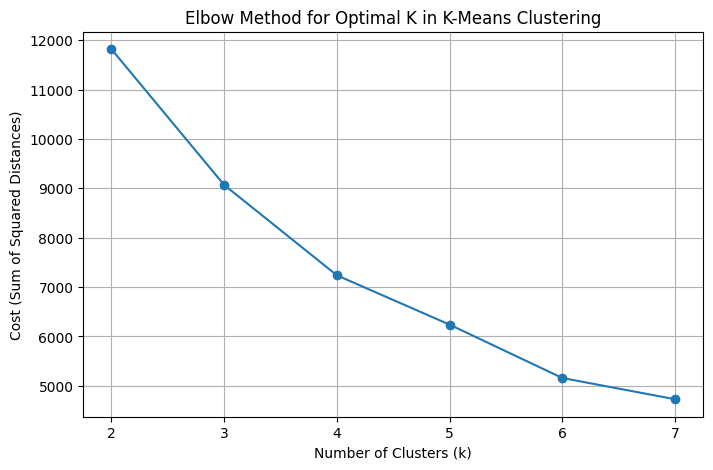

In [9]:
# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, costs, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Cost (Sum of Squared Distances)")
plt.title("Elbow Method for Optimal K in K-Means Clustering")
plt.grid()
plt.show()

In [10]:
# 7: Train K-Means Clustering Model with Optimal K
kmeans = KMeans(featuresCol="scaled_features", predictionCol="Cluster", k=4)
model = kmeans.fit(df_scaled)
df_clusters = model.transform(df_scaled)

In [11]:
# 8: Evaluate Cluster Sizes
df_clusters.groupBy("Cluster").count().show()

+-------+-----+
|Cluster|count|
+-------+-----+
|      1| 1101|
|      3| 1196|
|      2|  974|
|      0| 1001|
+-------+-----+



In [12]:
# 9. Extract cluster centroids
centroids = model.clusterCenters()

# Convert centroids to DataFrame for better readability
import pandas as pd
centroid_df = pd.DataFrame(centroids, columns=["Total_Spending", "Total_Transactions", "Avg_Quantity", "Avg_Price"])

# Add cluster labels
centroid_df["Cluster"] = centroid_df.index

# Display the cluster characteristics
print("Cluster Centroids (Average Feature Values):")
print(centroid_df)

Cluster Centroids (Average Feature Values):
   Total_Spending  Total_Transactions  Avg_Quantity  Avg_Price  Cluster
0        1.536677            1.307081      3.772733   2.916230        0
1        2.520657            3.168717      3.052309   2.376396        1
2        0.712806            1.387006      1.758405   2.705706        2
3        0.504319            1.421882      2.960153   1.057309        3


In [13]:
# 10. Summarize Key Characteristics of Each Cluster
df_clusters.groupBy("Cluster").agg(
    avg("Total_Spending").alias("Avg_Total_Spending"),
    avg("Total_Transactions").alias("Avg_Transactions"),
    avg("Avg_Quantity").alias("Avg_Quantity"),
    avg("Avg_Price").alias("Avg_Price")
).orderBy("Avg_Total_Spending", ascending=False).show()

+-------+------------------+------------------+------------------+------------------+
|Cluster|Avg_Total_Spending|  Avg_Transactions|      Avg_Quantity|         Avg_Price|
+-------+------------------+------------------+------------------+------------------+
|      1|10661.419082652132|3.7974568574023615|2.6570768997880716|1070.1173314627397|
|      0| 6499.560989010992|1.5664335664335665|3.2842157842157844|1313.2106793206824|
|      2| 3014.897967145791| 1.662217659137577| 1.530715263518138| 1218.409405373033|
|      3|2133.0755267558543|1.7040133779264215|2.5768534002229666|476.11783653846214|
+-------+------------------+------------------+------------------+------------------+



In [14]:
# 11. Compute Silhouette Score for Cluster Quality Evaluation
from pyspark.ml.evaluation import ClusteringEvaluator
evaluator = ClusteringEvaluator(featuresCol="scaled_features", predictionCol="Cluster", metricName="silhouette")
silhouette_score = evaluator.evaluate(df_clusters)
silhouette_score

0.4357661797950901

In [15]:
# 12: Save Segmented Customer Data
df_clusters.select("Customer_ID", "Total_Spending", "Total_Transactions", "Cluster").write.mode("overwrite").csv("customer_segmentation.csv", header=True)

#### Based on the above result the customers are segmented into following 3 clusters: 

##### 1. Cluster 0 - Regular Buyers
##### 2. Cluster 1 - VIP / High-Value Customers
##### 3. Cluster 2 - Occasional Buyers
##### 4. Cluster 3 - Budget Buyers

## ------------------------------------------------------------------------------------------------------